This is strategy analysis while considering commission and slippage cost to generate net profit.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Apple Trade data analysis

In [24]:
aapl_trade_data = pd.read_pickle('metrics_AAPL.pkl')
aapl_trade_data.head()

,Sharpe Ratio,Annualized Return,Max Drawdown,Volatility,Total Number of Trades,%win,Net Profit,Profit Factor,Average Trade Net Profit,Average Time in Trades,...,Avg Time Lost Trades,Average Won Trade,Average Lost Trade,Average Trade Ratio,fast_sma_value,slow_sma_value,lookback_value,commission_per_share,slippage_per_share,symbol
0,-0.6284,-0.0071,-0.0393,0.0113,997,33.9%,£-1944.98,0.9065,£-1.95,20.51 hrs,...,13.98 hrs,£55.78,£31.61,1.7647,1,10,10,0.05,0.03,AAPL
1,-0.1634,-0.0026,-0.0153,0.0151,508,34.06%,£-361.4,0.9747,£-0.71,40.24 hrs,...,26.39 hrs,£80.38,£42.71,1.8817,1,10,20,0.05,0.03,AAPL
2,-0.6284,-0.0071,-0.0393,0.0113,997,33.9%,£-1944.98,0.9065,£-1.95,20.51 hrs,...,13.98 hrs,£55.78,£31.61,1.7647,1,11,10,0.05,0.03,AAPL
3,-0.1634,-0.0026,-0.0153,0.0151,508,34.06%,£-361.4,0.9747,£-0.71,40.24 hrs,...,26.39 hrs,£80.38,£42.71,1.8817,1,11,20,0.05,0.03,AAPL
4,-0.6103,-0.0070,-0.0390,0.0114,995,33.87%,£-1906.43,0.9083,£-1.92,20.55 hrs,...,14.0 hrs,£56.01,£31.63,1.7707,1,12,10,0.05,0.03,AAPL


In [25]:
aapl_trade_data[aapl_trade_data['Total Number of Trades'] == aapl_trade_data['Total Number of Trades'].max()].iloc[0]

,0
Sharpe Ratio,-0.6284
Annualized Return,-0.0071
Max Drawdown,-0.0393
Volatility,0.0113
Total Number of Trades,997
%win,33.9%
Net Profit,£-1944.98
Profit Factor,0.9065
Average Trade Net Profit,£-1.95
Average Time in Trades,20.51 hrs


In [26]:
aapl_trade_data[aapl_trade_data['Total Number of Trades'] == aapl_trade_data['Total Number of Trades'].min()].iloc[0]

,629
Sharpe Ratio,-1.7038
Annualized Return,-0.0339
Max Drawdown,-0.0327
Volatility,0.0201
Total Number of Trades,288
%win,32.99%
Net Profit,£-2685.57
Profit Factor,0.7847
Average Trade Net Profit,£-9.32
Average Time in Trades,70.83 hrs


In [27]:
aapl_trade_data['Net Profit'] = (aapl_trade_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"AAPL minimum net profit/biggest loss: {aapl_trade_data['Net Profit'].min()}")
print(f"AAPL maximum net profit: {aapl_trade_data['Net Profit'].max()}")

AAPL minimum net profit/biggest loss: -5268.36
AAPL maximum net profit: -84.39


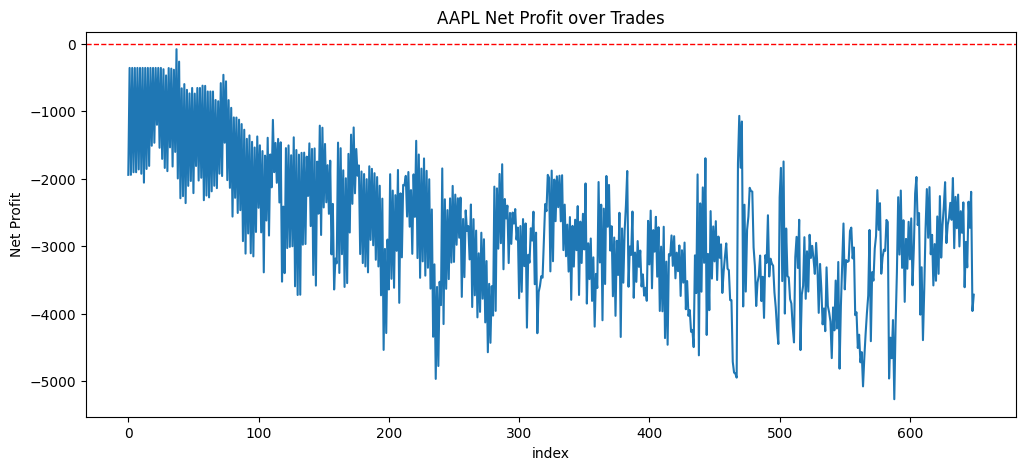

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(data=aapl_trade_data, x=aapl_trade_data.index, y='Net Profit')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("AAPL Net Profit over Trades")
plt.xlabel("index")
plt.ylabel("Net Profit")
plt.show()

This strategy produces all negative result for the apple(AAPL) stock.

### Google Trade data Analysis

In [29]:
googl_trade_data = pd.read_pickle('metrics_GOOG.pkl')
googl_trade_data.head()

,Sharpe Ratio,Annualized Return,Max Drawdown,Volatility,Total Number of Trades,%win,Net Profit,Profit Factor,Average Trade Net Profit,Average Time in Trades,...,Avg Time Lost Trades,Average Won Trade,Average Lost Trade,Average Trade Ratio,fast_sma_value,slow_sma_value,lookback_value,commission_per_share,slippage_per_share,symbol
0,-1.3271,-0.0187,-0.0539,0.0141,957,34.48%,£-4819.85,0.8138,£-5.04,21.37 hrs,...,15.02 hrs,£63.84,£41.55,1.5364,1,10,10,0.05,0.03,GOOG
1,-0.6063,-0.0127,-0.0347,0.0207,483,35.82%,£-1664.04,0.9097,£-3.45,42.34 hrs,...,28.19 hrs,£96.85,£59.61,1.6248,1,10,20,0.05,0.03,GOOG
2,-1.3271,-0.0187,-0.0539,0.0141,957,34.48%,£-4819.85,0.8138,£-5.04,21.37 hrs,...,15.02 hrs,£63.84,£41.55,1.5364,1,11,10,0.05,0.03,GOOG
3,-0.6063,-0.0127,-0.0347,0.0207,483,35.82%,£-1664.04,0.9097,£-3.45,42.34 hrs,...,28.19 hrs,£96.85,£59.61,1.6248,1,11,20,0.05,0.03,GOOG
4,-1.3271,-0.0187,-0.0539,0.0141,957,34.48%,£-4819.85,0.8138,£-5.04,21.37 hrs,...,15.02 hrs,£63.84,£41.55,1.5364,1,12,10,0.05,0.03,GOOG


In [30]:
googl_trade_data[googl_trade_data['Total Number of Trades'] == googl_trade_data['Total Number of Trades'].max()].iloc[0]

,0
Sharpe Ratio,-1.3271
Annualized Return,-0.0187
Max Drawdown,-0.0539
Volatility,0.0141
Total Number of Trades,957
%win,34.48%
Net Profit,£-4819.85
Profit Factor,0.8138
Average Trade Net Profit,£-5.04
Average Time in Trades,21.37 hrs


In [31]:
googl_trade_data[googl_trade_data['Total Number of Trades'] == googl_trade_data['Total Number of Trades'].min()].iloc[0]

,649
Sharpe Ratio,-0.3423
Annualized Return,-0.0101
Max Drawdown,-0.0297
Volatility,0.0284
Total Number of Trades,256
%win,39.45%
Net Profit,£-700.92
Profit Factor,0.9484
Average Trade Net Profit,£-2.74
Average Time in Trades,79.68 hrs


In [32]:
googl_trade_data['Net Profit'] = (googl_trade_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"GOOGL minimum net profit/biggest loss: £{googl_trade_data['Net Profit'].min()}")
print(f"GOOGL maximum net profit: £{googl_trade_data['Net Profit'].max()}")

GOOGL minimum net profit/biggest loss: £-5882.98
GOOGL maximum net profit: £2329.85


In [33]:
googl_trade_data[googl_trade_data['Net Profit'] == googl_trade_data['Net Profit'].min()].iloc[0]

,88
Sharpe Ratio,-1.6954
Annualized Return,-0.025
Max Drawdown,-0.0647
Volatility,0.0149
Total Number of Trades,875
%win,33.6%
Net Profit,-5882.98
Profit Factor,0.7708
Average Trade Net Profit,£-6.72
Average Time in Trades,23.37 hrs


In [34]:
googl_trade_data[googl_trade_data['Net Profit'] == googl_trade_data['Net Profit'].max()].iloc[0]

,588
Sharpe Ratio,0.9704
Annualized Return,0.0218
Max Drawdown,-0.0156
Volatility,0.0224
Total Number of Trades,390
%win,40.51%
Net Profit,2329.85
Profit Factor,1.1556
Average Trade Net Profit,£5.97
Average Time in Trades,52.25 hrs


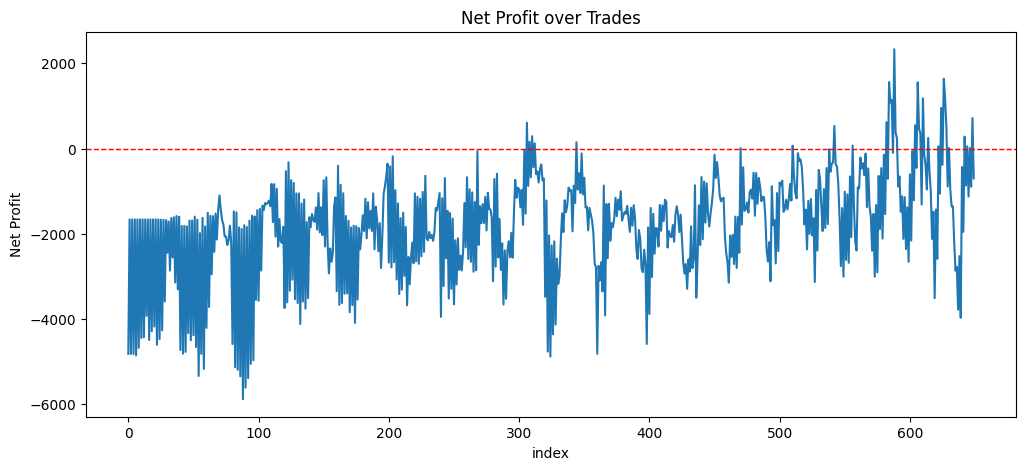

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=googl_trade_data, x=googl_trade_data.index, y='Net Profit')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Net Profit over Trades")
plt.xlabel("index")
plt.ylabel("Net Profit")
plt.show()

The sma crossover strategy produces some positive result on the GOOGLE stock. Indexes close to zero are the initial fast sma values starting from 1, and slow sma values starting from 10. the lookback period alternates between 10 and 20 for the sake ofsimplicity.

With the net profit getting better with increasing index value, it indicates that the strategy works better with higher fast sma values and higher slow sma values.

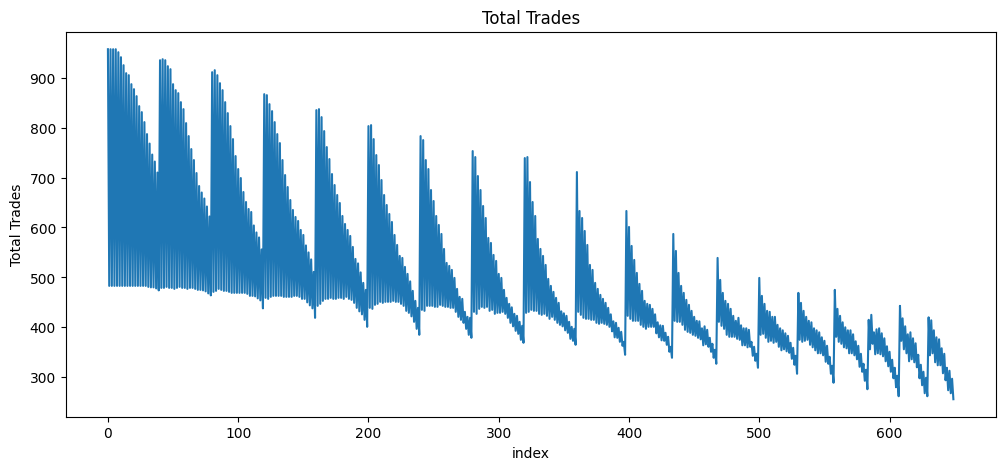

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(data=googl_trade_data, x=googl_trade_data.index, y='Total Number of Trades')
plt.title("Total Trades")
plt.xlabel("index")
plt.ylabel("Total Trades")
plt.show()

The figure above plots total trades taken at each combination. It is evident that with higher fast sma and slow sma values, lesser trades are taken, which coincides with higher profit by the strategy.

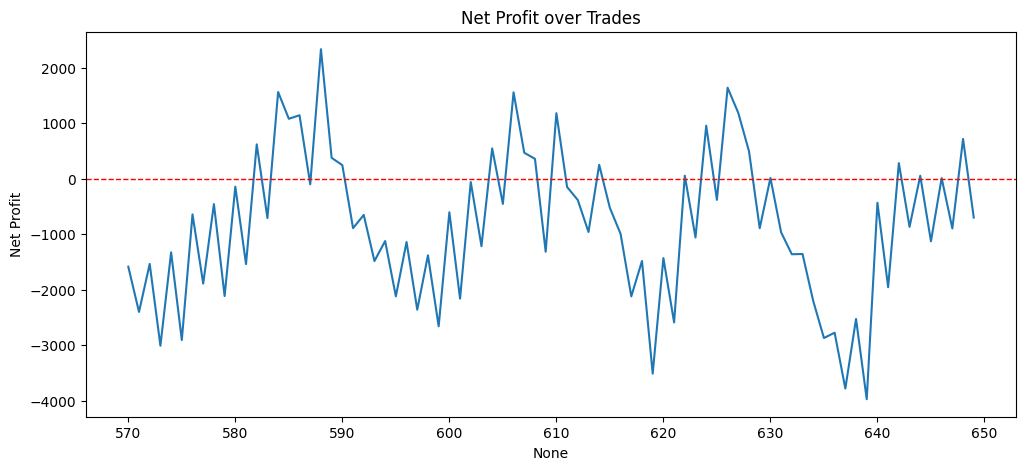

In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(data=googl_trade_data[570:], x=googl_trade_data.index[570:], y='Net Profit')
# Add horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Net Profit over Trades")
plt.show()

The goal of optimised strategies is to produce parameters with the best results and whose neighboring values produce similar results. This helps to ensure that in the case of chaning market conditions, the strategy can still produce positive results.

The closest to this is the sma values within the index range 583 to 590.

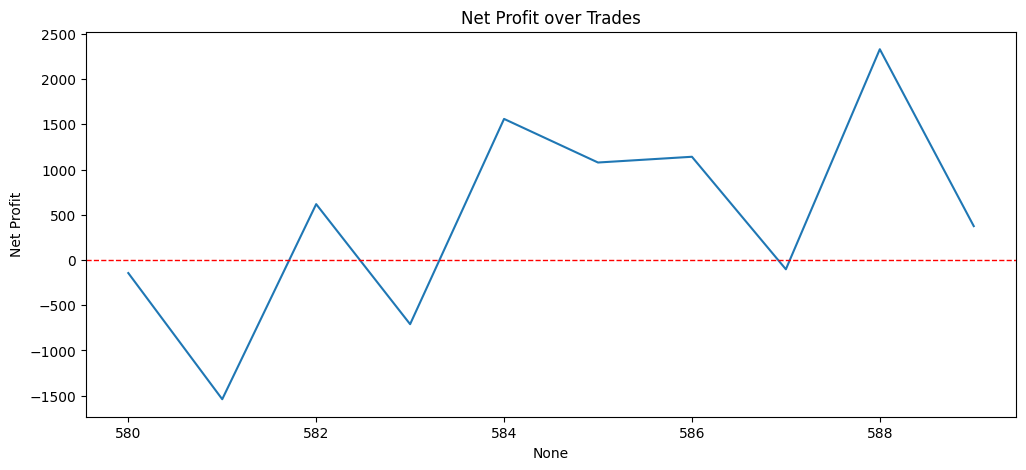

In [38]:
plt.figure(figsize=(12,5))
sns.lineplot(data=googl_trade_data[580:590], x=googl_trade_data.index[580:590], y='Net Profit')
# Add horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Net Profit over Trades")
plt.show()

In [39]:
googl_trade_data[(googl_trade_data.index >= 580) & (googl_trade_data.index <= 590)]


,Sharpe Ratio,Annualized Return,Max Drawdown,Volatility,Total Number of Trades,%win,Net Profit,Profit Factor,Average Trade Net Profit,Average Time in Trades,...,Avg Time Lost Trades,Average Won Trade,Average Lost Trade,Average Trade Ratio,fast_sma_value,slow_sma_value,lookback_value,commission_per_share,slippage_per_share,symbol
580,-0.0551,-0.0016,-0.0272,0.0245,327,36.09%,-144.42,0.9900,£-0.44,62.24 hrs,...,39.55 hrs,£121.53,£69.64,1.7451,16,28,10,0.05,0.03,GOOG
581,-0.7487,-0.0192,-0.0364,0.0255,293,36.52%,-1539.13,0.8947,£-5.25,69.7 hrs,...,44.6 hrs,£122.27,£78.61,1.5553,16,28,20,0.05,0.03,GOOG
582,0.3026,0.0071,-0.0204,0.0244,315,35.24%,617.37,1.0455,£1.96,64.61 hrs,...,41.97 hrs,£127.93,£66.91,1.9120,16,29,10,0.05,0.03,GOOG
583,-0.3613,-0.0094,-0.0285,0.0253,276,37.32%,-709.64,0.9469,£-2.57,73.91 hrs,...,48.38 hrs,£122.92,£77.28,1.5905,16,29,20,0.05,0.03,GOOG
584,0.6363,0.0137,-0.0268,0.0218,415,39.76%,1559.47,1.1012,£3.76,49.28 hrs,...,33.17 hrs,£102.83,£61.63,1.6685,17,18,10,0.05,0.03,GOOG
585,0.4841,0.0110,-0.0276,0.0232,356,37.92%,1077.51,1.0742,£3.03,57.43 hrs,...,38.61 hrs,£115.59,£65.73,1.7585,17,18,20,0.05,0.03,GOOG
586,0.4627,0.0098,-0.0246,0.0215,425,38.35%,1141.02,1.0712,£2.68,48.12 hrs,...,32.47 hrs,£105.26,£61.13,1.7219,17,19,10,0.05,0.03,GOOG
587,-0.0356,-0.0011,-0.0299,0.0229,367,36.24%,-102.74,0.9934,£-0.28,55.72 hrs,...,38.79 hrs,£115.58,£66.13,1.7477,17,19,20,0.05,0.03,GOOG
588,0.9704,0.0218,-0.0156,0.0224,390,40.51%,2329.85,1.1556,£5.97,52.25 hrs,...,34.03 hrs,£109.52,£64.55,1.6968,17,20,10,0.05,0.03,GOOG
589,0.1779,0.0039,-0.0263,0.0235,346,38.44%,374.29,1.0253,£1.08,59.09 hrs,...,40.48 hrs,£113.97,£69.4,1.6421,17,20,20,0.05,0.03,GOOG


Starting from index 584 until 590, the strategy produced results in this order; £1559.47, £1077.51, £1141.02, -£102.74, £2329.85, £374.29, £242.56. For these ones the sma values for fast and slow are within the range 16 & 17 for fast sma and 18,19,20 for slow sma, while the lookback period alternates between 10 and 20. Unfortunately, this isnt the perfect scenario, but somewhat close. So we choose the parameter values as follows:

fast sma value = 17

slow sma value = 20

lookback value = 10

### Microsoft Trade data analysis

In [40]:
msft_trade_data = pd.read_pickle('metrics_MSFT.pkl')
msft_trade_data.head()

,Sharpe Ratio,Annualized Return,Max Drawdown,Volatility,Total Number of Trades,%win,Net Profit,Profit Factor,Average Trade Net Profit,Average Time in Trades,...,Avg Time Lost Trades,Average Won Trade,Average Lost Trade,Average Trade Ratio,fast_sma_value,slow_sma_value,lookback_value,commission_per_share,slippage_per_share,symbol
0,-0.9899,-0.0109,-0.0403,0.011,999,33.93%,£-2958.94,0.8593,£-2.96,20.47 hrs,...,13.07 hrs,£53.31,£31.86,1.6730,1,10,10,0.05,0.03,MSFT
1,-1.8052,-0.0268,-0.0384,0.015,520,35.38%,£-3788.97,0.7720,£-7.29,39.18 hrs,...,26.74 hrs,£69.72,£49.46,1.4097,1,10,20,0.05,0.03,MSFT
2,-0.9899,-0.0109,-0.0403,0.011,999,33.93%,£-2958.94,0.8593,£-2.96,20.47 hrs,...,13.07 hrs,£53.31,£31.86,1.6730,1,11,10,0.05,0.03,MSFT
3,-1.8052,-0.0268,-0.0384,0.015,520,35.38%,£-3788.97,0.7720,£-7.29,39.18 hrs,...,26.74 hrs,£69.72,£49.46,1.4097,1,11,20,0.05,0.03,MSFT
4,-0.9899,-0.0109,-0.0403,0.011,999,33.93%,£-2958.94,0.8593,£-2.96,20.47 hrs,...,13.07 hrs,£53.31,£31.86,1.6730,1,12,10,0.05,0.03,MSFT


In [41]:
msft_trade_data[msft_trade_data['Total Number of Trades'] == msft_trade_data['Total Number of Trades'].min()].iloc[0]

,649
Sharpe Ratio,-1.8703
Annualized Return,-0.0366
Max Drawdown,-0.0311
Volatility,0.0198
Total Number of Trades,278
%win,34.17%
Net Profit,£-2802.18
Profit Factor,0.7641
Average Trade Net Profit,£-10.08
Average Time in Trades,73.22 hrs


In [42]:
msft_trade_data[msft_trade_data['Total Number of Trades'] == msft_trade_data['Total Number of Trades'].max()].iloc[0]

,0
Sharpe Ratio,-0.9899
Annualized Return,-0.0109
Max Drawdown,-0.0403
Volatility,0.011
Total Number of Trades,999
%win,33.93%
Net Profit,£-2958.94
Profit Factor,0.8593
Average Trade Net Profit,£-2.96
Average Time in Trades,20.47 hrs


In [43]:
msft_trade_data['Net Profit'] = (msft_trade_data['Net Profit'].replace('[£,]', '', regex=True).astype(float))
print(f"MSFT minimum net profit/biggest loss: {msft_trade_data['Net Profit'].min()}")
print(f"MSFT maximum net profit: {msft_trade_data['Net Profit'].max()}")

MSFT minimum net profit/biggest loss: -7093.38
MSFT maximum net profit: -424.32


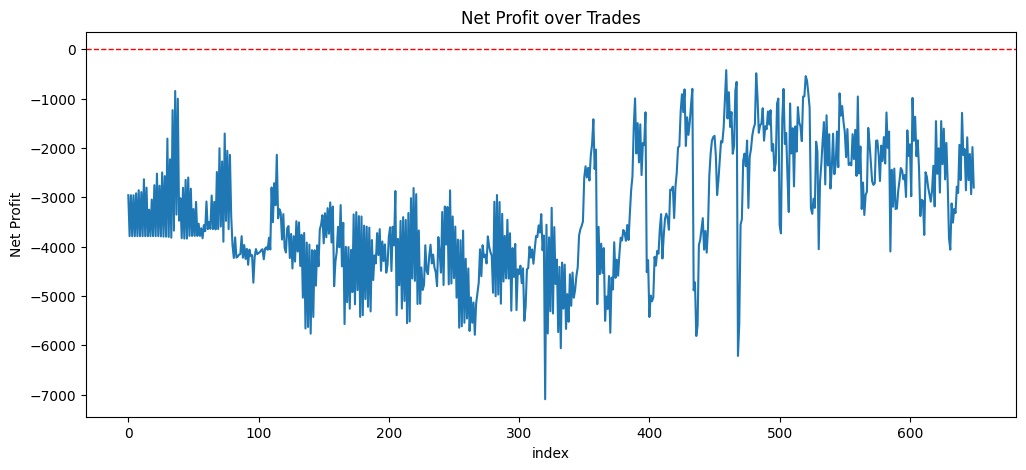

In [44]:
plt.figure(figsize=(12,5))
sns.lineplot(data=msft_trade_data, x=msft_trade_data.index, y='Net Profit')
# Add horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Net Profit over Trades")
plt.xlabel("index")
plt.ylabel("Net Profit")
plt.show()

Unfortunately, the strategy performs really poorly on the Microsoft stock. But it is also evident that the strategy did performed relatively better at the last end of the data,indicating that higher sma values performs relatively better than lower sma values.